## Lab 8:  Clustering
Environmental justice (EJ) seeks to ensure that all communities, regardless of socioeconomic status or demographic background, have equal access to clean air, water, and, in the form of energy justice, access to renewable energy resources while minimizing exposure to environmental hazards. In this lab, we will apply clustering analysis to explore how U.S. counties group together based on renewable energy potential, demographic characteristics, and environmental risk factors.

The EEIP dataset was collated by the National Renewable Energy Lab (NREL) and contains a large set of features from multiple other databases including SLOPE (renewable energy potential) and EJSCREEN (environmental risk indicators).

Link to metadata: https://ucsb.box.com/s/x3olvh3rd8w5h7xz8jnm3v8g3t4ajjsg

First you will step through a guided clustering exploration of renewable energy production potential.  Then you will formulate a question of your own that brings in an environmental justice component.


### Step 0: Load Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the EEIP dataset 
eeip_data = pd.read_csv("/courses/EDS232/Data/eeip.data.csv")

## Part I:
In this part, we will step through an analysis that examines how US counties cluster in their potential production of renewable energy.  

### Step 1: Exploratory Data Analysis

First we need to check for missing data and remove incomplete rows. Since clustering is a distance-based technique, we also need to ensure that the features used for clustering are scaled appropriately to prevent dominant features from skewing results.  For our first analysis, use the following variables from the SLOPE dataset related to energy production potential as your features: 
- `utility_pv_technical_generation_potential_mwh`
- `residential_pv_technical_generation_potential_mwh`
- `land_based_wind_technical_generation_potential_mwh`
- `commercial_pv_technical_generation_potential_mwh`

*Information on these variables is available on line 7 of the ColumnsExplained tab of the metadata*

Once you have removed incomplete rows and scaled, print the shape of your processed dataframe. 

In [7]:
# Filter dataset to just the columns I want
eeip_clean = eeip_data[['utility_pv_technical_generation_potential_mwh',
                       'residential_pv_technical_generation_potential_mwh',
                       'land_based_wind_technical_generation_potential_mwh',
                       'commercial_pv_technical_generation_potential_mwh']]

# Drop the NAs in the rows
eeip_clean = eeip_clean.dropna()

# Trying to be specific in the scaling
column_names = [
    "utility_pv_technical_generation_potential_mwh",
    "residential_pv_technical_generation_potential_mwh",
    "land_based_wind_technical_generation_potential_mwh",
    "commercial_pv_technical_generation_potential_mwh"
]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(eeip_clean[column_names])

# Create a new DataFrame with the scaled features
eeip_scaled = pd.DataFrame(scaled_features, columns=column_names)

# Print the shape of the df now that we have cleaned and scaled it
print(f"Shape of cleaned and scaled df: {eeip_scaled.shape}")

Shape of cleaned and scaled df: (3107, 4)


### Step 2: Hierarchical Clustering Analysis

Now that we have preprocessed our dataset and standardized the energy potential features, we will use hierarchical clustering to explore how counties group together based on their energy potential.

A dendrogram is a tree-like visualization that shows how clusters are merged step by step. By analyzing the dendrogram, we can decide the optimal number of clusters by looking at the distance between merges.

Use `linkage()` to perform the clustering.  Use 'ward' for the `method` parameter, a method which minimizes the variance within clusters, producing well-balanced groups. We will first visualize the **full dendrogram** using `dendrogram` before deciding on a truncation strategy.


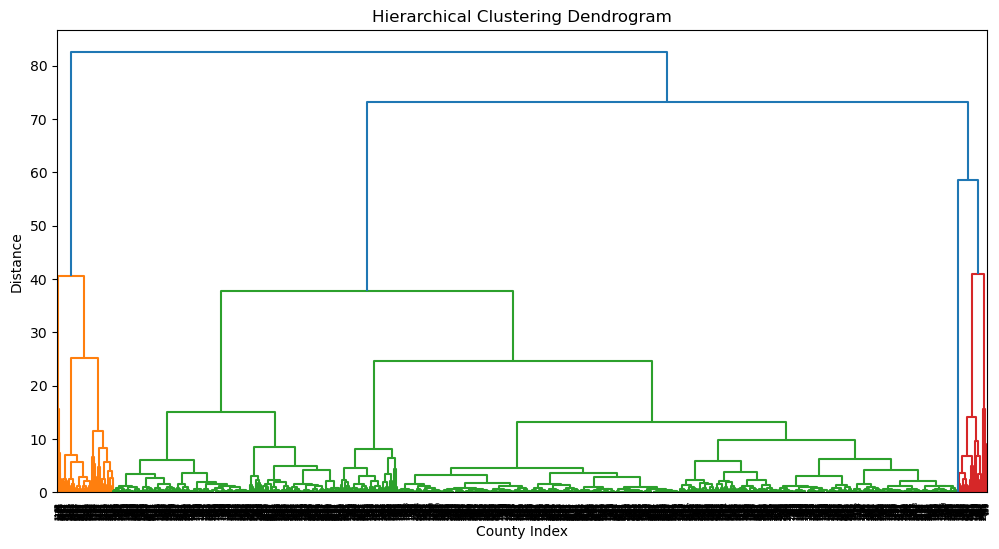

In [8]:
# Perform hierarchical clustering using ward method
clustered = linkage(eeip_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(clustered)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('County Index')
plt.ylabel('Distance')
plt.show()

### Step 3: Set Up Cluster Interpretation

After determining the optimal number of clusters from the dendrogram, we now assign each county to a cluster using the extracted cluster labels.

To better understand the clustering results, we will:
- Define `num_clusters` as the ideal number of clusters based on the dendrogram created above
- Extract cluster assignment attribute from the hierarchical clustering using `fcluster()` with `criterion = "maxclust"`
- Create a new variable `Cluster` in your cleaned dataframe and assign cluster labels to it
- Compute and print the mean values of the original energy potential features for each cluster.

This summary will help us interpret how counties differ in energy potential across clusters and inform possible next steps for analysis.


In [9]:
# Define the ideal number of clusters - I am going based on color here
ideal_clus = 3

# Extract cluster assignnment attribute from the hierarchical clustering
cluster_assignment = fcluster(clustered, ideal_clus, criterion = 'maxclust')

# Create the Cluster variable in the original cleaned df
eeip_scaled['Cluster'] = cluster_assignment

# Compute and print the mean values of the original energy potential features for each cluster
mean_cluster = eeip_scaled.groupby('Cluster').mean()
print(mean_cluster)

         utility_pv_technical_generation_potential_mwh  \
Cluster                                                  
1                                             2.831068   
2                                            -0.184742   
3                                            -0.082331   

         residential_pv_technical_generation_potential_mwh  \
Cluster                                                      
1                                                -0.193351   
2                                                -0.121549   
3                                                 3.869056   

         land_based_wind_technical_generation_potential_mwh  \
Cluster                                                       
1                                                 3.004580    
2                                                -0.185776    
3                                                -0.383628    

         commercial_pv_technical_generation_potential_mwh  
Cluster               

### Step 4: Visualizing Energy Potential Across Clusters
Now that we have assigned cluster labels, we want to understand how energy potential differs across clusters. To do this, we will visualize these differences using a grouped bar chart.

Each bar should represent the mean value of an energy potential indicator for a specific cluster. These different patterns of potential is what caused the model to segregate the clusters in the way that it did.

<Figure size 1200x600 with 0 Axes>

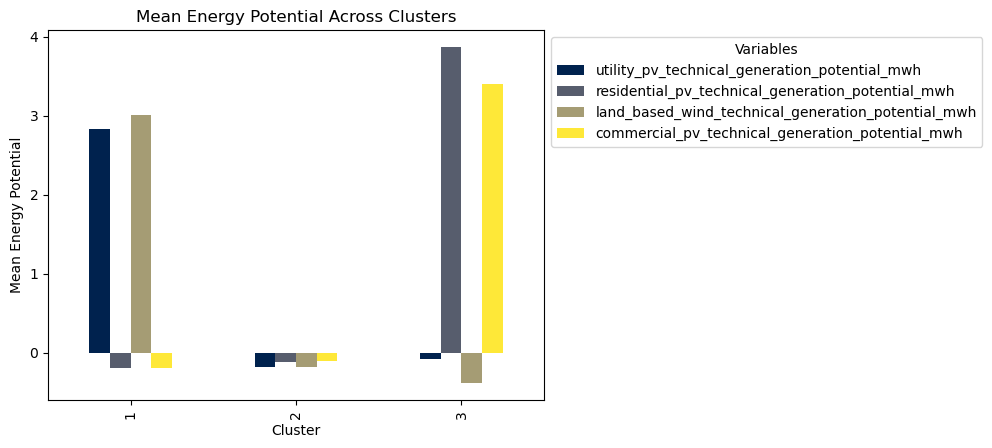

In [12]:
# Make a plot that shows energy potential between clusters
plt.figure(figsize=(12, 6))
mean_cluster.plot(kind = 'bar',
                 colormap = 'cividis')

plt.title("Mean Energy Potential Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Mean Energy Potential")

plt.legend(title="Variables",
           loc="upper left",
          bbox_to_anchor = (1, 1))

plt.show()

### Step 5: Interpret Clustering Results
Interpret your plot of the resulting clusters.  How would you characterize and compare the four different clusters in terms of their profile of energy generation?

***It seems like cluster 1 has high potential for both land based wind and utility pv. Cluster three is a high potential for the other two categories, which are commercial pv and residential pv. Cluster two seemed to have the most variables with lowest potential, so the means are low on all of them. It seems like the data have been clustered well, with cluster 1 and 3 together capturing all of the categories.***

## Part II: Environmental Justice Metrics
Now it's your turn.

So far, we have clustered counties based on **energy potential**, but energy potential alone does not tell the full story of **energy equity and access**. To deepen the analysis, we need to consider environmental justice (EJ) factors that affect communities’ ability to benefit from renewable energy and the environmental burdens they already experience.

1. Explore EJSCREEN variables:  
   - The EJSCREEN subset of our dataset contains metrics on pollution burden, demographics (population size), and health risks (*lines 31-41 of the ColumnsExplained tab in the metadata sheet linked above*).
   - Identify 1-3 variables that could be important for energy equity analysis.  You could introduce them either as clustering features, as post-clustering variables to help interpret the clusters, or both. 

2. Modify the clustering approach:  
   - Add your selected EJSCREEN variables to our feature set.    
   - Re-run the hierarchical clustering analysis with the expanded dataset (if you added any as clustering features).  

3. Interpret the Results:
   Your interpretation could include considerations such as:
   - How do clusters change when EJSCREEN variables are included?  
   - Are counties with high renewable energy potential also burdened by environmental risks?  
   - What policy recommendations might emerge from these findings?  

In [25]:
# Explore the EJSCREEN variables

# Convert column names to a list and print them out
column_names_list = eeip_data.columns.tolist()

# Display all column names
for column in column_names_list:
    print(column)

county_fips
county
state
county_pop
utilitypv_techpot_quint
utility_pv_technical_generation_potential_mwh
residentialpv_techpot_quint
residential_pv_technical_generation_potential_mwh
landbasedwind_techpot_quint
land_based_wind_technical_generation_potential_mwh
commercialpv_techpot_quint
commercial_pv_technical_generation_potential_mwh
commercialpv_lcoe_cap_quint
commercial_pv_lcoe_capital_price_per_mw_median
commercialpv_lcoe_quint
commercial_pv_lcoe_price_per_mwh_median
geothermal_lcoe_cap_quint
geothermal_lcoe_capital_price_per_mw_median
geothermal_lcoe_quint
geothermal_lcoe_price_per_mwh_median
hydro_lcoe_cap_quint
hydro_lcoe_capital_price_per_mw_median
hydro_lcoe_quint
hydro_lcoe_price_per_mwh_median
landbasedwind_lcoe_cap_quint
land_based_wind_lcoe_capital_price_per_mw_median
landbasedwind_lcoe_quint
land_based_wind_lcoe_price_per_mwh_median
utilitypv_lcoe_cap_quint
pv_lcoe_capital_price_per_mw_median
utilitypv_lcoe_quint
pv_lcoe_price_per_mwh_median
residentialpv_lcoe_cap_quint

In [28]:
# Filter dataset to just the columns I want, including EJSCREEEN
eeip_clean_ej = eeip_data[['utility_pv_technical_generation_potential_mwh',
                       'residential_pv_technical_generation_potential_mwh',
                       'land_based_wind_technical_generation_potential_mwh',
                       'commercial_pv_technical_generation_potential_mwh',
                       'lowincome_indicator']]

# Drop the NAs in the rows
eeip_clean_ej = eeip_clean_ej.dropna()

# Trying to be specific in the scaling
column_names_ej = [
    "utility_pv_technical_generation_potential_mwh",
    "residential_pv_technical_generation_potential_mwh",
    "land_based_wind_technical_generation_potential_mwh",
    "commercial_pv_technical_generation_potential_mwh",
    "lowincome_indicator"
]

# Scale the features
scaler = StandardScaler()
scaled_features_ej = scaler.fit_transform(eeip_clean_ej[column_names_ej])

# Create a new DataFrame with the scaled features
eeip_scaled_ej = pd.DataFrame(scaled_features_ej, columns=column_names_ej)

# Print the shape of the df now that we have cleaned and scaled it
print(f"Shape of cleaned and scaled df: {eeip_scaled_ej.shape}")

Shape of cleaned and scaled df: (3107, 5)


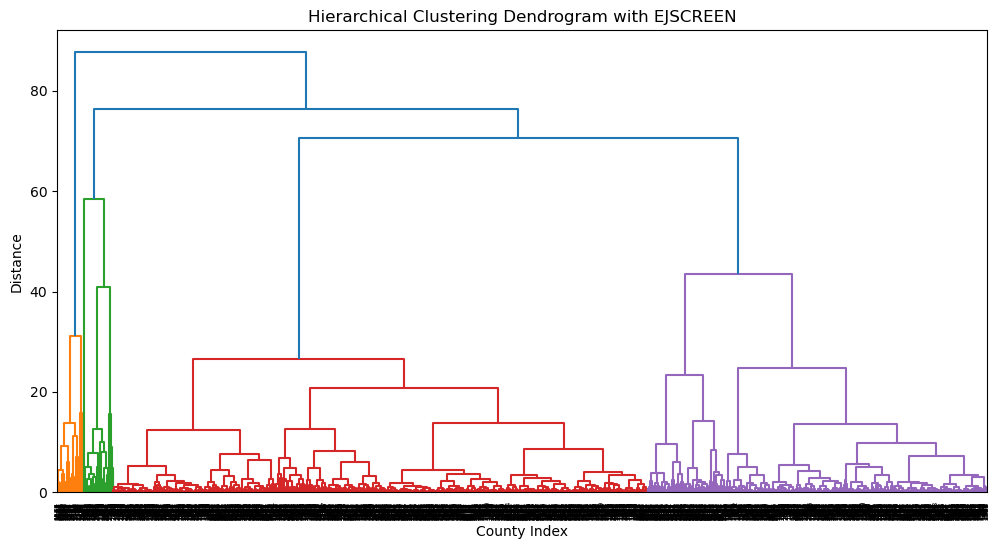

In [31]:
# Perform hierarchical clustering using ward method
clustered_ej = linkage(eeip_scaled_ej, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(clustered_ej)
plt.title('Hierarchical Clustering Dendrogram with EJSCREEN')
plt.xlabel('County Index')
plt.ylabel('Distance')
plt.show()

In [30]:
# Define the ideal number of clusters with EJSCREEN data added - I am going based on color here
ideal_clus_ej = 4

# Extract cluster assignnment attribute from the hierarchical clustering
cluster_assignment_ej = fcluster(clustered_ej, ideal_clus_ej, criterion = 'maxclust')

# Create the Cluster variable in the original cleaned df
eeip_scaled_ej['Cluster'] = cluster_assignment_ej

# Compute and print the mean values of the original energy potential features for each cluster
mean_cluster_ej = eeip_scaled_ej.groupby('Cluster').mean()
print(mean_cluster_ej)

         utility_pv_technical_generation_potential_mwh  \
Cluster                                                  
1                                             4.264780   
2                                            -0.084686   
3                                            -0.196049   
4                                            -0.022461   

         residential_pv_technical_generation_potential_mwh  \
Cluster                                                      
1                                                -0.121334   
2                                                 3.836926   
3                                                -0.044316   
4                                                -0.248778   

         land_based_wind_technical_generation_potential_mwh  \
Cluster                                                       
1                                                 4.248637    
2                                                -0.384008    
3                         

<Figure size 1200x600 with 0 Axes>

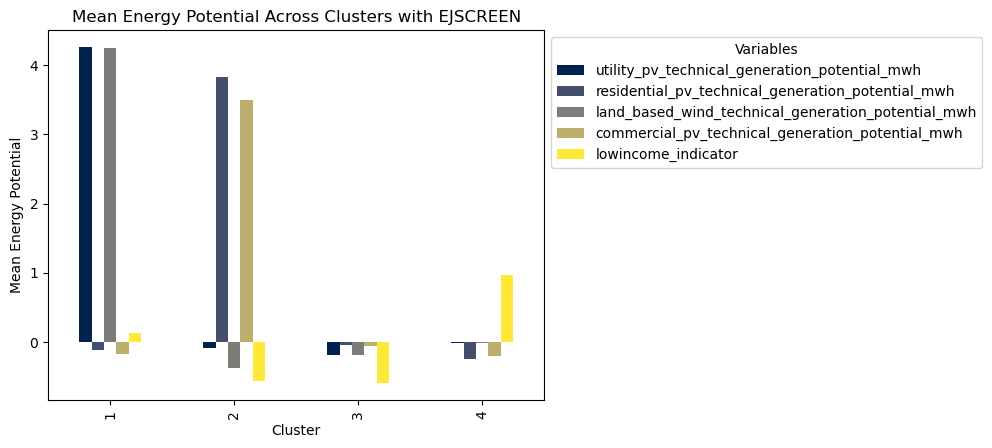

In [32]:
# Make a plot that shows energy potential between clusters...now including EJSCREEN data!!
plt.figure(figsize=(12, 6))
mean_cluster_ej.plot(kind = 'bar',
                 colormap = 'cividis')

plt.title("Mean Energy Potential Across Clusters with EJSCREEN")
plt.xlabel("Cluster")
plt.ylabel("Mean Energy Potential")

plt.legend(title="Variables",
           loc="upper left",
          bbox_to_anchor = (1, 1))

plt.show()

Which EJSCREEN variable(s) did you add to the analysis? Why did you choose these?  What is the question you are interested in? What did you learn from the analysis

***I added the low income indicator to my analysis, because it seems like low income is a category that would be good at capturing many different burdens, theoretically. For example, low income areas tend to also be areas at higher risk of environmental burdens, based on other analysis. So, it seemed like a good way to analyze this important trend.***

***Based on the analysis I ran, it seems like low income indicators are highest in categories where the potential energy means are the lowest. If I'm understanding this right, it seems like energy potential in low income areas is low on average.***

***From this analysis, I learned that clustering can help reveal trends that impact environmental justice. This makes clustering a useful tool for this kind of analysis that looks at means, particularly.***

***One policy recommendation might be to encourage the development of renewable energy projects in low income areas, to ensure that jobs are created where they are needed most.***